In [4]:
import numpy as np #for array operations
import matplotlib.pyplot as plt #for ploting the image
import cv2 #for operations

In [2]:
#Simple numpy array
img= np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

print(img)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


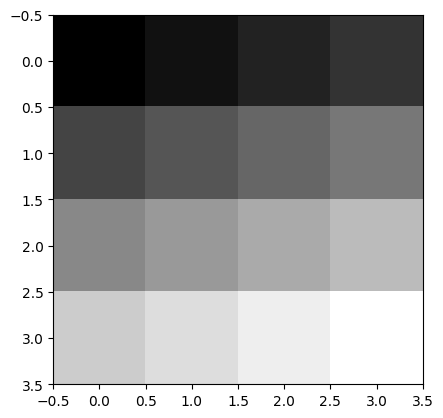

In [3]:
plt.imshow(img, cmap='gray')
plt.show()

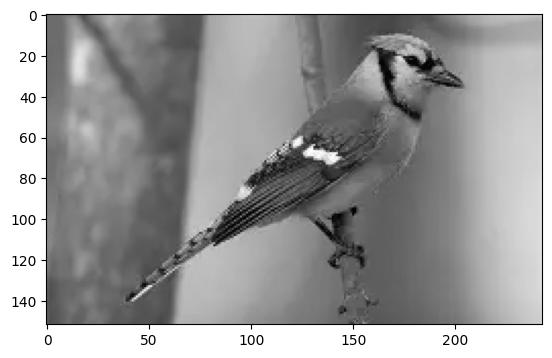

[[108 108 108 ... 195 197 201]
 [108 108 108 ... 190 191 196]
 [108 108 108 ... 180 182 186]
 ...
 [ 90  84  79 ... 204 206 211]
 [ 90  84  79 ... 205 206 211]
 [ 90  84  79 ... 205 206 209]]


In [6]:
img = cv2.imread("/content/OIP.webp")
plt.imshow(img, cmap='gray')
plt.show()
print(img)

In [7]:
# Image size (shape)
print("Image Shape (H, W, C):", img.shape,"\n")   # e.g., (512, 512, 3)

# Total size in pixels
height, width = img.shape[0], img.shape[1]
print("Width:", width, " Height:", height,"\n")

num_pixels= height* width
print("Number of pixels:", num_pixels,"\n")

# If RGB
if img.ndim == 3:
    print("Number of channels:", img.shape[2],"\n")

# Data type of pixels
print("Data type:", img.dtype,"\n")

# Bit depth
bit_depth = img.dtype.itemsize * 8   # bytes * 8 = bits
print("Bit depth per channel:", bit_depth, "bits","\n")


Image Shape (H, W, C): (152, 243) 

Width: 243  Height: 152 

Number of pixels: 36936 

Data type: uint8 

Bit depth per channel: 8 bits 



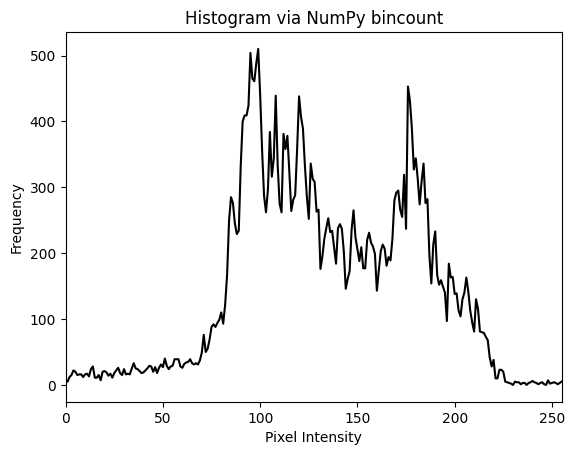

In [10]:
hist = np.bincount(img.ravel(), minlength=256)

plt.plot(hist, color='black')
plt.title("Histogram via NumPy bincount")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.show()

[[147 147 147 ...  60  58  54]
 [147 147 147 ...  65  64  59]
 [147 147 147 ...  75  73  69]
 ...
 [165 171 176 ...  51  49  44]
 [165 171 176 ...  50  49  44]
 [165 171 176 ...  50  49  46]]


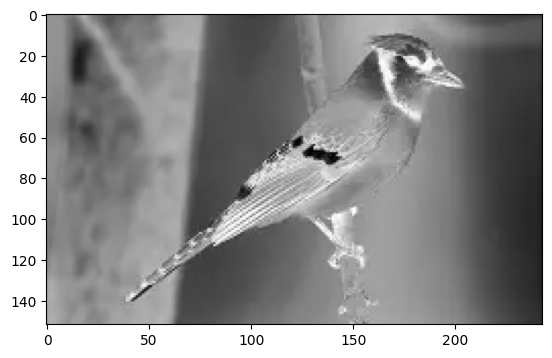

In [9]:
imgn = 255 - img
print(imgn)
plt.imshow(imgn, cmap='gray')
plt.show()

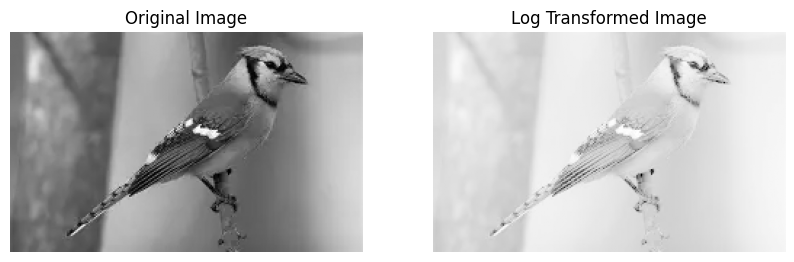

In [11]:
c = 255 / np.log1p(np.max(img))
img_log = c * np.log1p(img)
img_log = np.array(img_log, dtype=np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_log, cmap='gray')
plt.title("Log Transformed Image")
plt.axis("off")
plt.show()

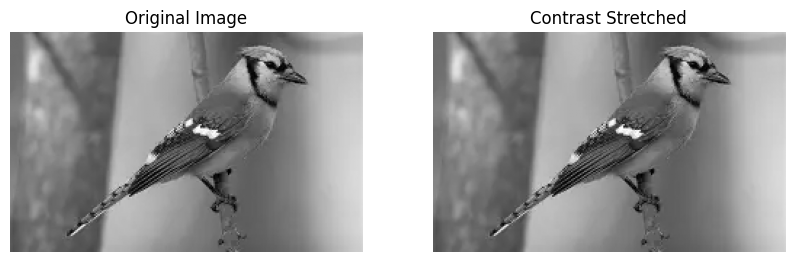

In [16]:
r_min, r_max = np.min(img), np.max(img)

stretched = ((img - r_min) / (r_max - r_min)) * 255
stretched = np.clip(stretched, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(stretched, cmap='gray')
plt.title("Contrast Stretched")
plt.axis("off")
plt.show()


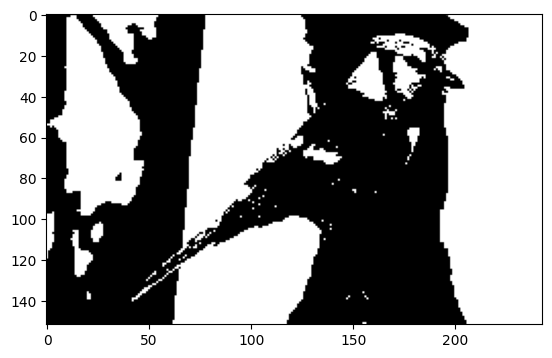

In [18]:
thresholded = np.where(img > 128, 255, 0)
plt.imshow(thresholded, cmap='gray')
plt.show()

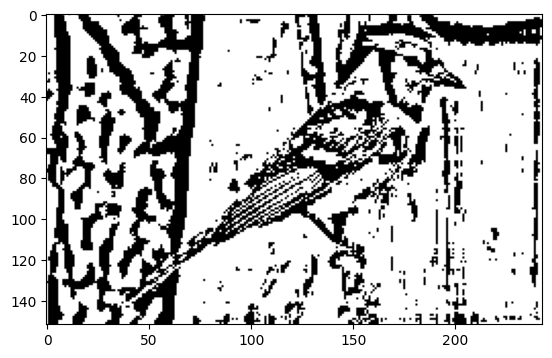

In [23]:
adaptive_mean = cv2.adaptiveThreshold(img, 255,
                                      cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY,
                                      11, 2)
plt.imshow(adaptive_mean, cmap='gray')
plt.show()

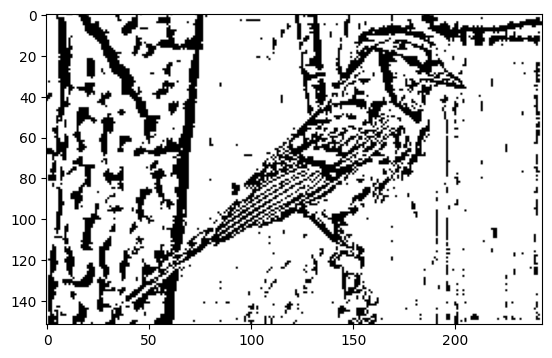

In [22]:
adaptive_gaussian = cv2.adaptiveThreshold(img, 255,
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY,
                                          11, 2)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.show()

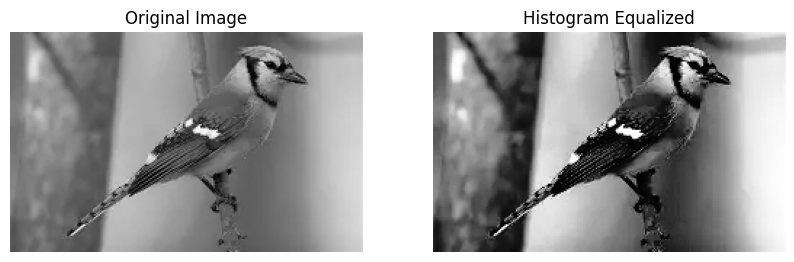

In [19]:
equalized = cv2.equalizeHist(img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized")
plt.axis("off")
plt.show()